In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d mahmoudreda55/satellite-image-classification

 92% 20.0M/21.8M [00:00<00:00, 209MB/s]
100% 21.8M/21.8M [00:00<00:00, 214MB/s]


In [3]:
import zipfile
zip_ref= zipfile.ZipFile('/content/satellite-image-classification.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import tensorflow
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from keras import Sequential

import cv2
import os

In [5]:
from keras.models import load_model

In [6]:
model = load_model("/content/drive/MyDrive/model1_vgg19.h5")

In [7]:
img_shape = [224,224]


def pred(path):

  img_array = cv2.imread(path)
  rgb_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
  resize_array = cv2.resize(rgb_array,img_shape)
  img_array = np.array(resize_array).reshape(-1,224,224)
  img_array = img_array / 255.00
  img_array = img_array.reshape(-1,224,224,3)

  predict = model.predict(img_array)
  label = np.argmax(predict,axis=1)
  prob = str(predict[0,label]*100) +'%'

  if label==0:
        ans = "Cloudy"
  elif label==1:
        ans= "Desert"
  elif label==2:
        ans= "Green Area"
  else:
        ans = "Water"

  return ans,prob

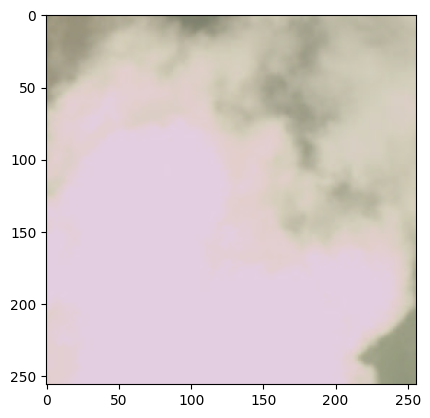

In [12]:
path = "/content/data/cloudy/train_10021.jpg"
img = cv2.imread(path)
rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)

In [11]:
pred(path)

1/1 [==============================] - 1s 687ms/step


('Cloudy', '[99.99816]%')